# Numerical Integration




## Exercise 2 - elementary quadrature
Using the Method of Undetermined Coefficients, find the 3-stage elementary quadrature $(n = 3)$ over the interval [-1,1], with the points $x_1 = -1$, $x_2 = 0$ and  $x_3 = 1$

Solution reads:

$
\begin{bmatrix}
1 & 1 & 1 \\
-1 & 0 & 1 \\
1 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
w_1 \\
w_2 \\
w_3
\end{bmatrix}
=
\begin{bmatrix}
2 \\
0 \\
2/3
\end{bmatrix}$

we retrieve the Simpson rule:

$\int_{-1}^{1} g(t)dt \approx 2 \left(\frac{1}{6}g(-1) + \frac{4}{6}g(0) + \frac{1}{6}g(1)\right)$

## Exercise 1, 3 and 4 - quadrature rules

exact value = 0.5028396202159002
method Rectangle_Left : value = 0.867298 , error = -0.364458
method Midpoint : value = 0.897512 , error = -0.394673
method Trapezoidal : value = 0.833348 , error = -0.330508
method Simpson : value = 0.876124 , error = -0.373285
method Gauss_2 : value = 0.0952473 , error = 0.407592
method Gauss_3 : value = 0.65843 , error = -0.15559


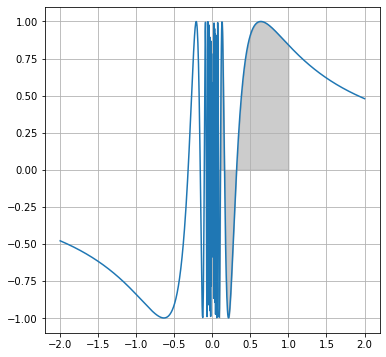

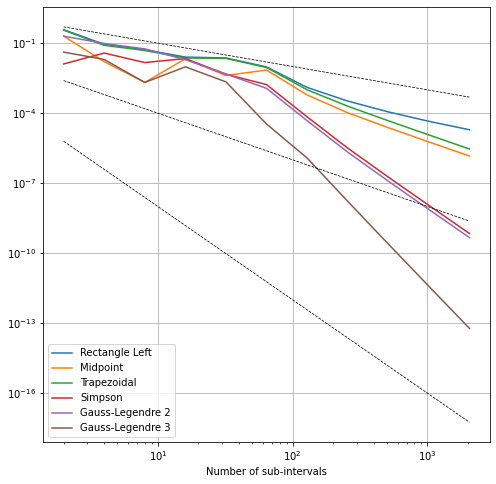

In [39]:
import errno
import numpy as np
from scipy.special import erf, sici
import matplotlib.pyplot as plt
from scipy.integrate import fixed_quad

def f(x):
    #return np.exp(-x**2) # --> exercise 2
    return np.sin(1/x)    # --> exercise 3

#exact_val = np.sqrt(np.pi)/2 * (erf(1) - erf(0))                                # -->  exercise 2
exact_val = np.sin(1.) - sici(1.)[1] - (0.05*np.sin(1./0.05) - sici(1./0.05)[1]) # --> exercise 3

print("exact value =", exact_val)

xini = 0.05
x = np.linspace(-2,2,1000)
section = np.linspace(xini,1,1000)
plt.figure(figsize = (6, 6))
plt.plot(x,f(x))
# show the area to be computed
plt.fill_between(section, f(section), color = "gray", alpha = 0.4)
plt.grid()

# Try methods to integrate on the interval [a,b]
def my_integral(f, a, b, method):
    h = b - a # step size
    if method == ("Rectangle_Left"):
        return h/2 * 2* f(a)
    elif method == ("Midpoint"):
        return h/2 * 2* f((a+b)/2)
    elif method == ("Trapezoidal"):
        return h/2 * ( f(a) + f(b) )
    elif method == ("Simpson"):
        return h/2 * (1/3*f(b) + 4/3*f((a+b)/2) + 1/3*f(a))
    elif method == ("Gauss_2"):
        return fixed_quad(f, a, b, n=2)[0]
    elif method == ("Gauss_3"):
        return fixed_quad(f, a, b, n=3)[0]
    else:
        raise Exception("Method not implemented yet !")

methods = ["Rectangle_Left", "Midpoint", "Trapezoidal", "Simpson", "Gauss_2", "Gauss_3"]

for m in methods:
    integral = my_integral(f, xini, 1, m)
    print("method %s" %m, ": value = %g" %integral, ", error = %g" %(exact_val-integral) )

Npts = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
errRL = []
errM = []
errT = []
errS = []
errG2 = []
errG3 = []
for n in range(len(Npts)):
    subset = np.linspace(xini,1,Npts[n]+1)
    cum_intRL=0 
    cum_intM=0
    cum_intT=0 
    cum_intS=0
    cum_intG2 = 0
    cum_intG3 = 0
    for i in range(Npts[n]):
        cum_intRL += my_integral(f, subset[i], subset[i+1], "Rectangle_Left")
        cum_intM += my_integral(f, subset[i], subset[i+1], "Midpoint")
        cum_intT += my_integral(f, subset[i], subset[i+1], "Trapezoidal")
        cum_intS += my_integral(f, subset[i], subset[i+1], "Simpson")
        cum_intG2 += my_integral(f, subset[i], subset[i+1], "Gauss_2")
        cum_intG3 += my_integral(f, subset[i], subset[i+1], "Gauss_3")
    #print("cumulated value with Rectangle left = %g" %cum_int, "with %i" %Npts[n], "points , error = %g" %(exact_val_g-cum_int) )
    errRL.append(np.abs(exact_val-cum_intRL))
    errM.append(np.abs(exact_val-cum_intM))
    errT.append(np.abs(exact_val-cum_intT))
    errS.append(np.abs(exact_val-cum_intS))
    errG2.append(np.abs(exact_val-cum_intG2))
    errG3.append(np.abs(exact_val-cum_intG3))

plt.figure(figsize=(8,8))
plt.plot(Npts,errRL,label="Rectangle Left")
plt.plot(Npts,errM,label="Midpoint")
plt.plot(Npts,errT,label="Trapezoidal")
plt.plot(Npts,errS,label="Simpson")
plt.plot(Npts,errG2,label="Gauss-Legendre 2")
plt.plot(Npts,errG3,label="Gauss-Legendre 3")
nn = np.linspace(2,2048,100)
plt.plot(nn,nn**(-1),'k--',linewidth=0.75)
plt.plot(nn,0.01*nn**(-2),'k--',linewidth=0.75)
plt.plot(nn,0.0001*nn**(-4),'k--',linewidth=0.75)
plt.yscale("log")
plt.grid()
plt.xscale("log")
plt.legend()
plt.xlabel('Number of sub-intervals');

## Exercise 5 - improper integrals

We need to integrate the improper function 
$$ I = \int_0^{\pi/2} \frac{\cos(x)}{\sqrt{x}} dx $$

which has a singularity at $x=0$. Under the transformation $x = t^2$ we obtain 

$$ I = \int_0^{\sqrt{\pi/2}} 2 \cos(t^2) dt $$

which has no singularity and is easily integrable by an adaptive routine.

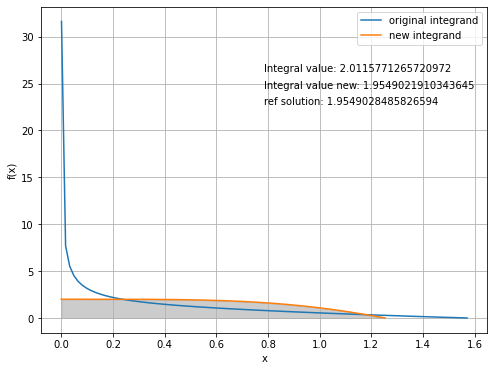

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the function
def func(x):
    return np.cos(x) / np.sqrt(x)

# Set the integration limits
a = 0.001
b = np.pi/2


# Compute the integral using numerical integration
x = np.linspace(a, b, 100)
integral = np.trapz(func(x), x)

# change of variable 
# Set the new integration limits
a_new = 0.
b_new = np.sqrt(np.pi/2)

t = np.linspace(a_new,b_new,1000)
def func_new(t):
    return 2*np.cos(t**2)

integral_new = np.trapz(func_new(t), t)

# Compute the integral using adaptive quadrature
ref_sol, error = quad(func_new, 0, np.sqrt(np.pi/2), epsabs=1e-16)


# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x, func(x),label="original integrand")
plt.plot(t, func_new(t),label="new integrand")
plt.fill_between(t, func_new(t), color = "gray", alpha = 0.4)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.text(0.5, 0.8, f'Integral value: {integral:.16f}', transform=plt.gca().transAxes)
plt.text(0.5, 0.75, f'Integral value new: {integral_new:.16f}', transform=plt.gca().transAxes)
plt.text(0.5, 0.7, f'ref solution: {ref_sol:.16f}', transform=plt.gca().transAxes)
plt.grid()
plt.show()




## Exercise 6 - Monte Carlo example

In [107]:
import numpy as np
from scipy.special import gamma

def monte_carlo_volume_sphere(dimensions, radius, num_points):
    # Generate random points in the hypercube [-R, R] in each dimension
    points = np.random.uniform(-radius, radius, (num_points, dimensions))
    
    # Calculate the distance from the origin for each point
    distances = np.linalg.norm(points, axis=1)
    
    # Count points inside the hypersphere
    points_inside = np.sum(distances <= radius)
    
    # Volume of the hypercube containing the sphere
    cube_volume = (2 * radius) ** dimensions
    
    # Estimate the volume of the hypersphere
    sphere_volume = (points_inside / num_points) * cube_volume
    
    # Calculate the error (standard error)
    p = points_inside / num_points
    sigma = np.sqrt(p * (1 - p))
    error = sigma * cube_volume / np.sqrt(num_points)
    
    return sphere_volume, error

def true_hypersphere_volume(dimensions, radius):
    return (np.pi ** (dimensions / 2) / gamma(dimensions / 2 + 1)) * radius ** dimensions

# Parameters
dimensions = 10
radius = 1
num_points = 1000000  # Number of random points

# Monte Carlo estimate
estimated_volume, error = monte_carlo_volume_sphere(dimensions, radius, num_points)

# True volume calculation
true_volume = true_hypersphere_volume(dimensions, radius)

print(f"Estimated volume of the {dimensions}-dimensional sphere: {estimated_volume:.4f} ± {error:.4f}")
print(f"True volume of the {dimensions}-dimensional sphere: {true_volume:.4f}")
print(f"Absolute error of Monte Carlo estimate: {abs(estimated_volume - true_volume):.4f}")

Estimated volume of the 10-dimensional sphere: 2.5528 ± 0.0511
True volume of the 10-dimensional sphere: 2.5502
Absolute error of Monte Carlo estimate: 0.0027


## Exercise 7 - finite differences

Text(0, 0.5, 'error - max. norm')

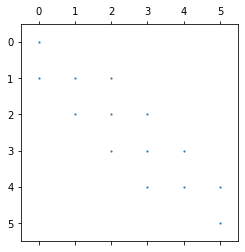

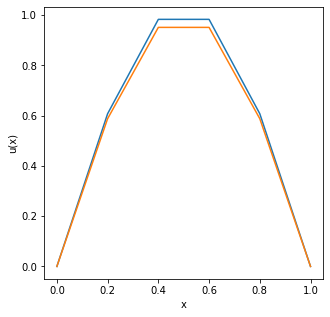

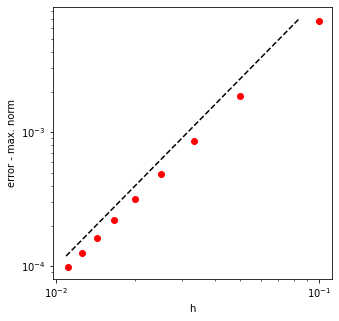

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.linalg import solve

def rhs(x):
	return np.pi**2*np.sin(np.pi*x)

def u_ex(x): 
	return np.sin(np.pi*x)

def build_FDM_matrix(xh, N): 
    step = xh[1] - xh[0]
    dy2 = diags([1, -2, 1], [-1, 0, 1], shape=(N, N)).toarray()
    #print(dy2)
    return -dy2/(step**2)

def solve_FDM1D(xh, N, plot_mat=False):
	Ah = build_FDM_matrix(xh, N)
	# add BC
	Ah[0,:] = np.concatenate(([1], np.zeros(N-1)))
	Ah[-1,:] = np.concatenate((np.zeros(N-1),[1]))
	# fill rhs
	fh = np.zeros(N)
	fh = rhs(xh)
	if (plot_mat):
		# plot matrix
		plt.figure(figsize = (4, 4))
		plt.spy(Ah, precision=0.1, markersize=1)
	uh = solve(Ah, fh)
	
	return uh

x0 = 0; xn = 1; N = 4
x_h = np.linspace(x0, xn, N+2)
uh = solve_FDM1D(x_h, N+2, True)
plt.figure(figsize = (5, 5))
plt.plot(x_h, uh, x_h, u_ex(x_h))
plt.xlabel('x')
plt.ylabel('u(x)')

errors = 0
step = []
plt.figure(figsize = (5, 5))
for i in range(10, 100, 10):
	xi = np.linspace(0, 1, i+2)
	ui = solve_FDM1D(xi, i+2)
	err_max = np.max(np.abs(ui - u_ex(xi)))
	plt.loglog(1/i, err_max, 'ro')
	step.append((xi[-1]-xi[0]) / len(xi))
plt.loglog(step, np.array(step)*np.array(step), "k--")
plt.xlabel('h')
plt.ylabel('error - max. norm')